In [1]:
import json
import gensim
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.decomposition import PCA
from matplotlib import pyplot
import numpy as np

In [2]:
f = open("./exjobb/af/af/spiders/desc.txt")
l = []
i = 0
for obj in f.readlines():
    obj = obj.strip('\n')
    obj = obj.replace('&amp;', '')
    obj = obj.replace('•', '')
    obj = obj.replace('.', '')
    #print(obj)
    json_obj = json.loads(obj)
    l.append(json_obj)
    if i < 5:
        print(json_obj['number'])
        print(json_obj['desc'])
        i += 1

17095
ctc Lota Bilvård har varit aktiva i 35 år och fortsätter att ge Västerås invånare och omgivande områden högkvalitativ däckservice, bilservice och rekond till rimliga priser Vi värdesätter långvariga kundrelationer och kundnöjdhet, hos oss får du bilvård i världsklass till ett överkomligt pris
14043
vfh Krafton AB grundades år 2013 och ägs av Andreé Arnberg Vi är ett elföretag som utför alla typer av elinstallationer i hela Stockholmsregionen Våra kunder är byggföretag, fastighetsbolag samt kommuner och privatpersoner Vi är idag 12 anställda och kontoret är beläget i Haninge 
17055
fga Varumärket +46 är ett resultat av flertalet uppköp och sammanslagningar av kundstockar som skett under de senaste åren +46 är den personliga och moderna uppstickaren till de stora nätägande mobiloperatörernaTelekombranschen går mer och mer åt det automatiserade hållet, där robotröster, talsvarstjänster och långa kötider blir allt vanligare I jakten på effektivisering och låga personalkostnader så ha

In [3]:
data = {'Number':[l[0]['number']], 'Description':[l[0]['desc'][4:]]}
df = pd.DataFrame(data)

In [4]:
eng_data = {'Number':[], 'Description':[]}
for i in range(1,len(l)-1):
    if ' is ' in l[i]['desc'][4:]:
        eng_data['Number'].append(l[i]['number'])
        eng_data['Description'].append(l[i]['desc'][4:])        
    else:   
        df = df.append({'Number':l[i]['number'], 'Description':l[i]['desc'][4:]}, ignore_index=True)

In [5]:
df_eng = pd.DataFrame(eng_data)

In [7]:
print(df_eng.tail(2))
print(df.tail(2))

     Number                                        Description
271     484  At Volumental we care about personal and profe...
272     161  Swedium Global is the growing System Engineeri...
      Number                                        Description
4698      47  Takmålarn i Stockholm är ett nischat måleriför...
4699      41  Assessit är ett av Skandinaviens ledande konsu...


In [7]:
model = gensim.models.Word2Vec.load('./wordvectors/data/sv.bin')

In [8]:
sentences = []
f = open('./wordvectors/data/sv.txt', 'a+')
for index, row in df.iterrows():
    #if index > 5:
    #    break
    desc = row['Description'].lower()
    str_num = str(row['Number'])
    f.write(desc + " " + str_num + '\r\n')
    sent = desc.split()
    sent.append(str_num)    
    #print(sent)
    sentences.append(sent)
f.close()   

In [ ]:
vector_size = 300
window_size = 5
vocab_size = 20000
num_negative = 5
def get_min_count(sents):
    '''
    Args:
      sents: A list of lists. E.g., [["I", "am", "a", "boy", "."], ["You", "are", "a", "girl", "."]]

    Returns:
      min_count: A uint. Should be set as the parameter value of word2vec `min_count`.   
    '''
    global vocab_size
    from itertools import chain

    fdist = nltk.FreqDist(chain.from_iterable(sents))
    # the count of the the top-kth word
    min_count = fdist.most_common(vocab_size)[-1][1]

    return min_count

In [ ]:
min_count = get_min_count(sentences)
model2 = gensim.models.Word2Vec(sentences, size=vector_size, min_count=min_count, negative= num_negative, window=window_size)
model.reset_from(model2)

In [116]:
#nltk.download()
from nltk.corpus import stopwords
stopwords = stopwords.words('swedish')
sent_wo_stop = []
for s in sentences:
    sent_wo_stop.append([word for word in s if word not in stopwords])    

In [117]:
print(sent_wo_stop[0])
print(sentences[0])

['lota', 'bilvård', 'aktiva', '35', 'år', 'fortsätter', 'ge', 'västerås', 'invånare', 'omgivande', 'områden', 'högkvalitativ', 'däckservice,', 'bilservice', 'rekond', 'rimliga', 'priser', 'värdesätter', 'långvariga', 'kundrelationer', 'kundnöjdhet,', 'hos', 'får', 'bilvård', 'världsklass', 'överkomligt', 'pris', '17095']
['lota', 'bilvård', 'har', 'varit', 'aktiva', 'i', '35', 'år', 'och', 'fortsätter', 'att', 'ge', 'västerås', 'invånare', 'och', 'omgivande', 'områden', 'högkvalitativ', 'däckservice,', 'bilservice', 'och', 'rekond', 'till', 'rimliga', 'priser', 'vi', 'värdesätter', 'långvariga', 'kundrelationer', 'och', 'kundnöjdhet,', 'hos', 'oss', 'får', 'du', 'bilvård', 'i', 'världsklass', 'till', 'ett', 'överkomligt', 'pris', '17095']


In [75]:
#model.wv.similarity('47', 'nischat')
#model.wv.similar_by_vector()
model['driven'] == mean_vector(model, ['driven'])

<ipython-input-75-c6c94a6efbff>:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  model['driven'] == mean_vector(model, ['driven'])


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [113]:
model.wv.similarity('Hej', 'hej')

KeyError: "word 'Hej' not in vocabulary"

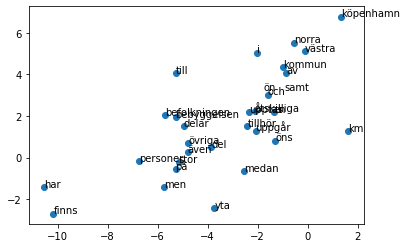

In [12]:
X = model.wv.__getitem__(model.wv.vocab)
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[0:29, 0], result[0:29, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    if i > 30:
        break
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [13]:
def mean_vector(model, sentence):
    words = [word for word in sentence if word in model.wv.vocab]
    if len(words) >= 1:
        return np.mean(model.wv.__getitem__(words), axis=0)
    else:
        return []

In [85]:
soft_skills1 = ['stark arbetsmoral', 'pålitlig', 'positiv attityd', 'driven', 'lagspelare', 'organiserad', 
               'presterar bra under stress', 'effektiv kommunikatör', 'flexibel', 'självsäker']
soft_skills = []
for i, s in enumerate(soft_skills1):
    s = s.split()
    soft_skills.append(s)
print(soft_skills)   

[['stark', 'arbetsmoral'], ['pålitlig'], ['positiv', 'attityd'], ['driven'], ['lagspelare'], ['organiserad'], ['presterar', 'bra', 'under', 'stress'], ['effektiv', 'kommunikatör'], ['flexibel'], ['självsäker']]


In [86]:
sent = sentences + soft_skills

In [118]:
#sent1 = mean_vector(model, sentences[0])
#print(sentences[0])
#print(sentences[1])
#sent2 = mean_vector(model, sentences[1])

means = []
sentes = []
i = 0
for s in sent_wo_stop:#sentences:
    #if i > 178:
    #    break
    s_new = mean_vector(model, s)
    if len(s_new) > 0:
        means.append(s_new)
        sentes.append(s)
    i += 1

In [121]:
means_soft_skills = []
softs = []
i = 0
for s in soft_skills:
    #if i > 178:
    #    break

    if s[0].isupper():
        s = [x.lower() for x in s]
    s_new = mean_vector(model, s)
    if len(s_new) > 0:
        means_soft_skills.append(s_new)
        softs.append(soft_skills1[i])
    i += 1

In [89]:
softs

['stark arbetsmoral',
 'positiv attityd',
 'driven',
 'organiserad',
 'presterar bra under stress',
 'effektiv kommunikatör']

In [56]:
len(sent)

4710

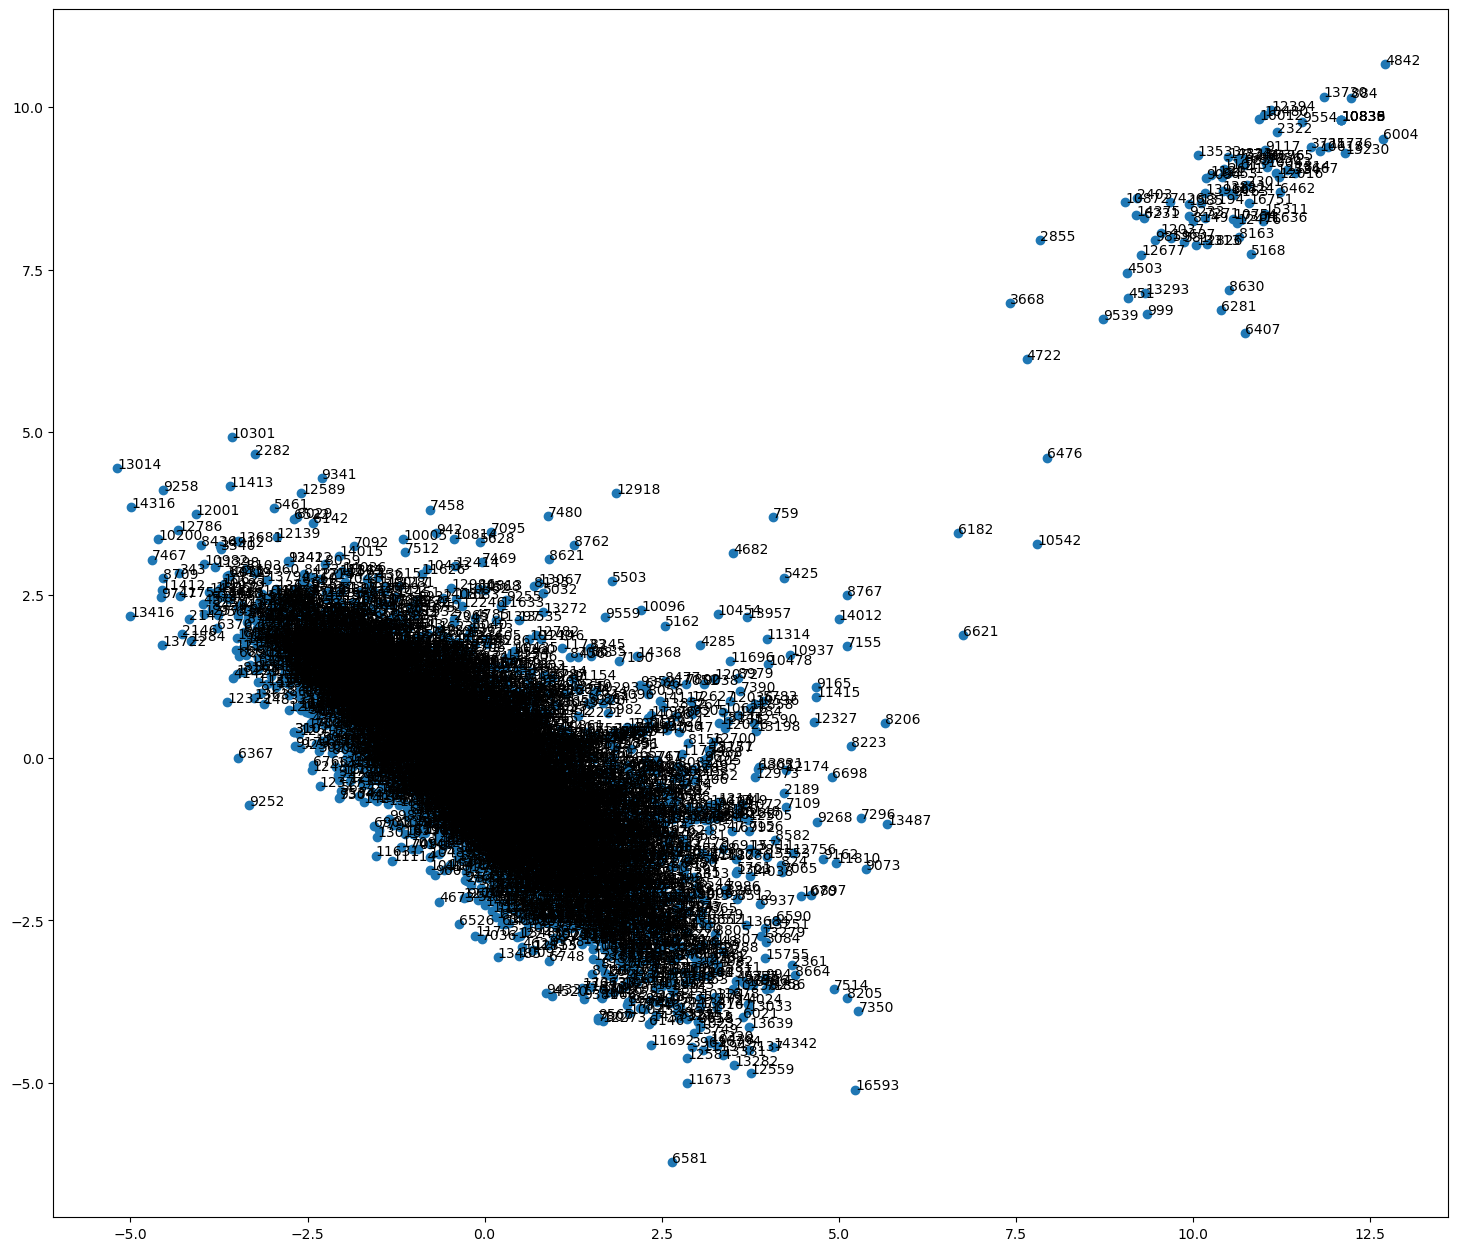

In [119]:
#sent = []
#sent.append(sent1)
#sent.append(sent2)

pca = PCA(n_components=2)
result1 = pca.fit_transform(means)
pyplot.figure(num=None, figsize=(18, 16), dpi=100, facecolor='w', edgecolor='k')        
pyplot.scatter(result1[:, 0], result1[:, 1])

for i, s in enumerate(sentes):
    pyplot.annotate(s[-1], xy=(result1[i, 0], result1[i, 1]))
    #if i > 4694:
     #   break
pyplot.show() 
    

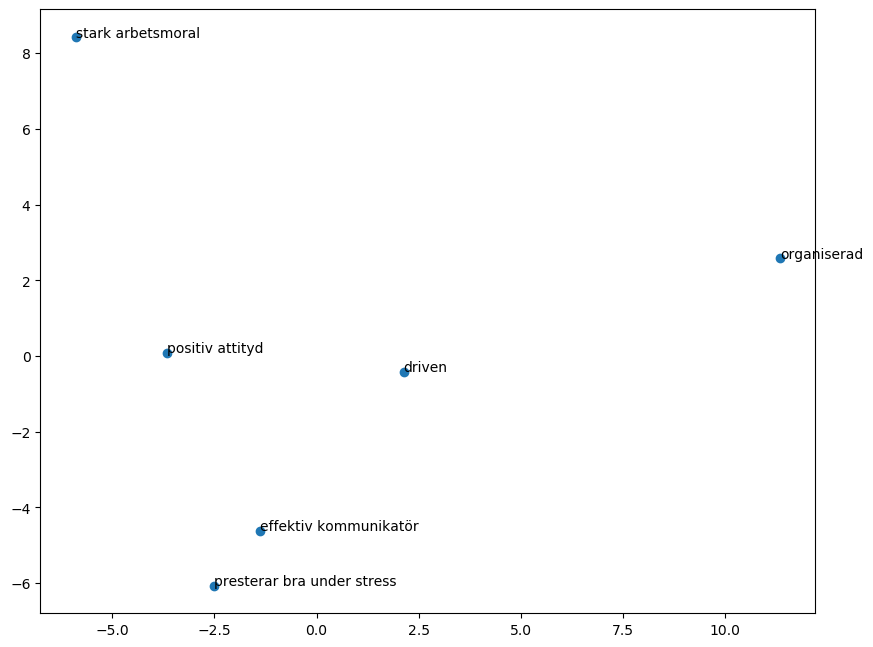

In [122]:
#sent = []
#sent.append(sent1)
#sent.append(sent2)

pca = PCA(n_components=2)
result1 = pca.fit_transform(means_soft_skills)
pyplot.figure(num=None, figsize=(10, 8), dpi=100, facecolor='w', edgecolor='k')        
pyplot.scatter(result1[:, 0], result1[:, 1])

for i, s in enumerate(softs):
    #if i == len(soft_skills)-1:
     #   break
    pyplot.annotate(s, xy=(result1[i, 0], result1[i, 1]))
    #if i > 4695:
    #    break
pyplot.show() 
    

In [ ]:
result1

In [101]:
len(means)

4696